In [ ]:
####### Kindly cite this notebook in your publications if you have used it for calculations.
####### Cite as : NyroMDNotebook v1, Girinath G. Pillai : https://github.com/giribio/MDNotebooks

In [ ]:
# Install anaconda from the web
# https://www.anaconda.com/products/individual

In [ ]:
# Install Gromacs from the web or execute this cell
!printf "y" | conda install -c bioconda gromacs

In [ ]:
# To install additional libraries execute this cell
!printf "y" | conda install nglview mdanalysis
!printf "y" | pip install GromacsWrapper pytraj

In [ ]:
# To initialise and enable NGLview, execute this cell
!jupyter-nbextension enable --py --sys-prefix widgetsnbextension
!jupyter-nbextension enable nglview --py --sys-prefix

In [ ]:
###### numpy and matplotlib required for result analysis and ploting

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [5]:
###### pytraj and nglview required for trajectory analysis and visualization 

In [6]:
import pytraj as pt
import nglview as nv

_ColormakerRegistry()

In [7]:
###### GromacsWrapper is required to use gromacs.options commands otherwise 
#use ! before gmx commands

In [8]:
import gromacs
import gromacs.formats

NOTE: Some configuration directories are not set up yet: 
	/Users/gpillai/.gromacswrapper
	/Users/gpillai/.gromacswrapper/qscripts
	/Users/gpillai/.gromacswrapper/templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


In [9]:
print(gromacs.release)

5.1.4


In [ ]:
# Commands with ! runs as the Gromacs commands, make sure Gromacs is installed annd the environment variables are set properly so that 'gmx' works on any directory. 
# Set GMXLIB path to the <Gromacs installation path>/share/gromacs/top
    #if not execute the following cell.

In [29]:
!export GMXLIB=/usr/local/share/gromacs/top
#update the location as per your installation

In [ ]:
# Rename your protein file (.pdb) to prot.pdb
# Remove HOH and clean the PDB file

In [3]:
!grep -v HOH prot.pdb > prot_clean.pdb
#if PDB has HOH, else skip this step
agree = input('Do you agree to cite this notebook? (y/n')
print (agree)

Do you agree to cite this notebook? (y/ny
y


### Generate Topology

####### Forcefield option -ff, you could give anyone of them


In [31]:
!gmx pdb2gmx -f prot_clean.pdb -o prot_pros.gro -water spce -ff amber99sb

                  :-) GROMACS - gmx pdb2gmx, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [10]:
!tail topol.top


[ system ]
; Name
LYSOZYME in water

[ molecules ]
; Compound        #mols
Protein_chain_A     1
SOL         10636
CL               8


#### Generate box and Solvate Protein

In [33]:
!gmx editconf -f prot_pros.gro -o prot_box.gro -c -d 1.0 -bt cubic

                 :-) GROMACS - gmx editconf, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [ ]:
#gromacs.solvate(cp="prot_box.gro", cs="spc216.gro", p="topol.top", o="prot_solv.gro")
# Uncomment above line if you want to run gmx through GromacsWrapper and do not execute next cell

In [34]:
!gmx solvate -cp prot_box.gro -cs spc216.gro -o prot_solv.gro -p topol.top

                  :-) GROMACS - gmx solvate, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Adding Ions

In [ ]:
#gromacs.grompp(f="ions.mdp", c="prot_solv.gro", p="topol.top", o="ions.tpr")
# Uncomment above line if you want to run gmx through GromacsWrapper and do not execute next cell

In [36]:
!gmx grompp -f ions.mdp -c prot_solv.gro -p topol.top -o ions.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [40]:
!printf "SOL" | gmx genion -s ions.tpr -o prot_solv_ions.gro -p topol.top -pname NA -nname CL -neutral

                  :-) GROMACS - gmx genion, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [41]:
!tail topol.top


[ system ]
; Name
LYSOZYME in water

[ molecules ]
; Compound        #mols
Protein_chain_A     1
SOL         10636
CL               8


### Energy Minimization Steps

In [ ]:
#gromacs.grompp(f="minim.mdp", c="prot_solv_ions.gro", p="topol.top", o="em.tpr")
# Uncomment above line if you want to run gmx through GromacsWrapper and do not execute next cell

In [42]:
!gmx grompp -f minim.mdp -c prot_solv_ions.gro -p topol.top -o em.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [ ]:
#gromacs.mdrun(v="yes", deffnm="em", nt="2")
# Uncomment above line if you want to run gmx through GromacsWrapper and do not execute next cell

### 'nt' is used to define the number of cores, in this example 2 cores are used, you could increase if required.

In [44]:
!gmx mdrun -v -deffnm em -nt 2

                   :-) GROMACS - gmx mdrun, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

Step=  230, Dmax= 1.8e-02 nm, Epot= -5.55771e+05 Fmax= 1.53745e+04, atom= 1015
Step=  232, Dmax= 1.1e-02 nm, Epot= -5.56048e+05 Fmax= 1.48725e+03, atom= 1015
Step=  233, Dmax= 1.3e-02 nm, Epot= -5.56283e+05 Fmax= 1.86028e+04, atom= 1015
Step=  234, Dmax= 1.6e-02 nm, Epot= -5.56650e+05 Fmax= 5.76295e+03, atom= 1015
Step=  236, Dmax= 9.5e-03 nm, Epot= -5.56710e+05 Fmax= 8.90953e+03, atom= 1958
Step=  237, Dmax= 1.1e-02 nm, Epot= -5.56796e+05 Fmax= 8.54554e+03, atom= 1958
Step=  238, Dmax= 1.4e-02 nm, Epot= -5.56814e+05 Fmax= 1.25504e+04, atom= 1958
Step=  239, Dmax= 1.6e-02 nm, Epot= -5.56893e+05 Fmax= 1.25827e+04, atom= 1958
Step=  241, Dmax= 9.8e-03 nm, Epot= -5.57094e+05 Fmax= 2.57892e+03, atom= 1958
Step=  242, Dmax= 1.2e-02 nm, Epot= -5.57154e+05 Fmax= 1.53361e+04, atom= 1958
Step=  243, Dmax= 1.4e-02 nm, Epot= -5.57401e+05 Fmax= 6.50783e+03, atom= 1958
Step=  245, Dmax= 8.5e-03 nm, Epot= -5.57480e+05 Fmax= 6.49418e+03, atom= 1958
Step=  246, Dmax= 1.0e-02 nm, Epot= -5.57534e+05 Fma

Step=  362, Dmax= 1.2e-02 nm, Epot= -5.65741e+05 Fmax= 1.05852e+04, atom= 1958
Step=  363, Dmax= 1.4e-02 nm, Epot= -5.65786e+05 Fmax= 1.09708e+04, atom= 1958
Step=  365, Dmax= 8.4e-03 nm, Epot= -5.65894e+05 Fmax= 2.00358e+03, atom= 1958
Step=  366, Dmax= 1.0e-02 nm, Epot= -5.65970e+05 Fmax= 1.34160e+04, atom= 1958
Step=  367, Dmax= 1.2e-02 nm, Epot= -5.66106e+05 Fmax= 5.27744e+03, atom= 1958
Step=  369, Dmax= 7.3e-03 nm, Epot= -5.66153e+05 Fmax= 5.88742e+03, atom= 1958
Step=  370, Dmax= 8.7e-03 nm, Epot= -5.66194e+05 Fmax= 7.58697e+03, atom= 1958
Step=  371, Dmax= 1.0e-02 nm, Epot= -5.66236e+05 Fmax= 8.50430e+03, atom= 1958
Step=  372, Dmax= 1.3e-02 nm, Epot= -5.66263e+05 Fmax= 1.08717e+04, atom= 1958
Step=  373, Dmax= 1.5e-02 nm, Epot= -5.66293e+05 Fmax= 1.22962e+04, atom= 1958
Step=  375, Dmax= 9.1e-03 nm, Epot= -5.66417e+05 Fmax= 1.64658e+03, atom= 1958
Step=  376, Dmax= 1.1e-02 nm, Epot= -5.66521e+05 Fmax= 1.48953e+04, atom= 1958
Step=  377, Dmax= 1.3e-02 nm, Epot= -5.66678e+05 Fma

Step=  494, Dmax= 7.5e-03 nm, Epot= -5.72216e+05 Fmax= 6.44854e+03, atom= 1958
Step=  495, Dmax= 9.0e-03 nm, Epot= -5.72247e+05 Fmax= 7.40939e+03, atom= 1958
Step=  496, Dmax= 1.1e-02 nm, Epot= -5.72270e+05 Fmax= 9.14638e+03, atom= 1958
Step=  497, Dmax= 1.3e-02 nm, Epot= -5.72291e+05 Fmax= 1.07858e+04, atom= 1958
Step=  498, Dmax= 1.6e-02 nm, Epot= -5.72300e+05 Fmax= 1.30458e+04, atom= 1958
Step=  499, Dmax= 1.9e-02 nm, Epot= -5.72301e+05 Fmax= 1.56069e+04, atom= 1958
Step=  501, Dmax= 1.1e-02 nm, Epot= -5.72443e+05 Fmax= 1.56241e+03, atom= 1958
Step=  502, Dmax= 1.3e-02 nm, Epot= -5.72482e+05 Fmax= 1.91945e+04, atom= 1958
Step=  503, Dmax= 1.6e-02 nm, Epot= -5.72674e+05 Fmax= 5.61338e+03, atom= 1958
Step=  505, Dmax= 9.7e-03 nm, Epot= -5.72691e+05 Fmax= 9.29912e+03, atom= 1958
Step=  506, Dmax= 1.2e-02 nm, Epot= -5.72729e+05 Fmax= 8.50911e+03, atom= 1958
Step=  508, Dmax= 7.0e-03 nm, Epot= -5.72785e+05 Fmax= 2.21358e+03, atom= 1958
Step=  509, Dmax= 8.3e-03 nm, Epot= -5.72827e+05 Fma

In [45]:
!printf "10 0" | gmx energy -f em.edr -o potential.xvg
# 10 is potential, please check the number in your version of Gromacs
# gmx energy - basic thermodynamic properties of the system

                  :-) GROMACS - gmx energy, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [65]:
potential = np.genfromtxt([i for i in open('potential.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'potential')

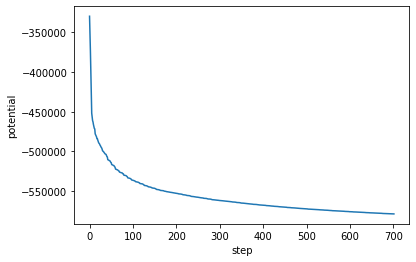

In [68]:
plt.plot(*potential.T)
plt.xlabel('step')
plt.ylabel('potential')

### Equilibration Steps - NVT

In [ ]:
#!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell

In [72]:
gromacs.grompp(f="nvt.mdp", c="em.gro", r="em.gro", p="topol.top", o="nvt.tpr")

(0, None, None)

In [ ]:
#!gmx mdrun -v -deffnm nvt -nt 2
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell

In [ ]:
gromacs.mdrun(v=True, deffnm="nvt", nt="2")

In [ ]:
#!gmx mdrun -v -deffnm nvt -cpi nvt.cpt -nt 2
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell
# If mdrun gets interrupted, you could restart by excuting this cell (uncomment) 

In [77]:
#gromacs.mdrun(v="yes", deffnm="nvt", cpi="nvt.cpt", nt="2")
# If mdrun gets interrupted, you could restart by excuting this cell (uncomment) 

(0, None, None)

In [89]:
!printf "15 0" | gmx energy -f nvt.edr -o temperature.xvg
# 15 is temperature, please check the number in your version of Gromacs
# gmx energy basic thermodynamic properties of the system

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [87]:
temperature = np.genfromtxt([i for i in open('temperature.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'temperature')

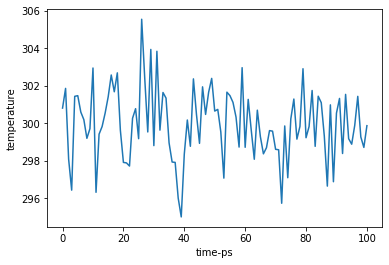

In [88]:
plt.plot(*temperature.T)
plt.xlabel('time-ps')
plt.ylabel('temperature')

### Equilibration Steps - NPT

In [83]:
#!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell

                  :-) GROMACS - gmx grompp, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [ ]:
gromacs.grompp(f="npt.mdp", c="nvt.gro", r="nvt.gro", p="topol.top", o="npt.tpr")

In [84]:
#!gmx mdrun -v -deffnm npt -nt 2
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell

                   :-) GROMACS - gmx mdrun, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [ ]:
gromacs.mdrun(v=True, deffnm="npt", nt="2")

In [1]:
#!gmx mdrun -v -deffnm npt -cpi npt.cpt -nt 3
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell
# If mdrun gets interrupted, you could restart by excuting this cell (uncomment) 

                   :-) GROMACS - gmx mdrun, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [9]:
!printf "17 0" | gmx energy -f npt.edr -o pressure.xvg
# gmx energy basic thermodynamic properties of the system

                  :-) GROMACS - gmx energy, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [13]:
pressure = np.genfromtxt([i for i in open('pressure.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'pressure')

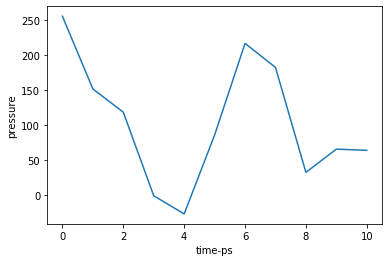

In [14]:
plt.plot(*pressure.T)
plt.xlabel('time-ps')
plt.ylabel('pressure')

In [16]:
!printf "23 0" | gmx energy -f npt.edr -o density.xvg
# gmx energy basic thermodynamic properties of the system

                  :-) GROMACS - gmx energy, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [17]:
density = np.genfromtxt([i for i in open('density.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'density')

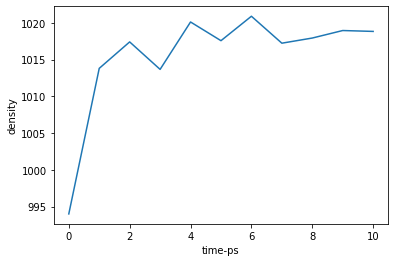

In [18]:
plt.plot(*density.T)
plt.xlabel('time-ps')
plt.ylabel('density')

#### Position-restrained equilibration
####### Optional w.r.t npt and nvt

In [ ]:
!gmx grompp -f posres.mdp -c npt.gro -p topol.top -o posres.tpr -maxwarn 2

In [ ]:
!gmx mdrun -v -deffnm posres -nt 2
#-stepout 10 -s posres.tpr   -c posres.pdb

In [ ]:
echo "System" | gmx trjconv -ur compact -s posres.tpr -f posres.xtc -pbc mol -o posres_ur.xtc

In [ ]:
%qtconsole
!vmd nvt.gro
#../emin/em.pdb posres_ur.xtc

### Equilibrium molecular dynamics - Production MD run

In [24]:
#!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md01.tpr
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell

                  :-) GROMACS - gmx grompp, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [ ]:
gromacs.grompp(f="md.mdp", c="npt.gro", t="npt.cpt", p="topol.top", o="md01.tpr")

In [25]:
#!gmx mdrun -v -deffnm md01 -nt 2
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell

                   :-) GROMACS - gmx mdrun, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [ ]:
gromacs.mdrun(v=True, deffnm="md01", nt="2")

In [ ]:
#!gmx mdrun -v -deffnm md01 -cpi md01.cpt -nt 2
# Uncomment above line if you want to run as a normal gmx command and do not execute next cell
# If mdrun gets interrupted, you could restart by excuting this cell (uncomment) 

### Trajectory Visualization

In [26]:
!printf "Protein\nSystem\n" | gmx trjconv -s md01.tpr -f md01.xtc -center -ur compact -pbc mol -o md01_center.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [27]:
!printf "Backbone\nSystem\n" | gmx trjconv -s md01.tpr -f md01_center.xtc -fit rot+trans -o md01_fit.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [29]:
#to visualize the trajectories
#vmd npt.gro md01_fit.xtc

In [12]:
#view.background = 'white'

traj1 = pt.load(nv.datafiles.XTC, nv.datafiles.PDB)
view1 = nv.show_pytraj(traj1)
view1

NGLWidget(max_frame=50)

In [15]:
# add new Trajectory
traj2 = pt.datafiles.load_tz2()
c = view1.add_trajectory(traj2)
view2 = nv.show_pytraj(traj2)
view2

NGLWidget(max_frame=100)

### Analysis

In [31]:
!printf "Protein\nSystem\n" | gmx trjconv -s md01.tpr -f md01.xtc -o md01_noPBC.xtc -pbc mol -center

                  :-) GROMACS - gmx trjconv, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [39]:
!printf "Backbone\nSystem\n" | gmx rms -s md01.tpr -f md01_noPBC.xtc -o rmsd.xvg -tu ns
#gmx rms - calculate the root mean square deviation from a reference structure

                    :-) GROMACS - gmx rms, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University,

In [40]:
rmsd = np.genfromtxt([i for i in open('rmsd.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'rmsd')

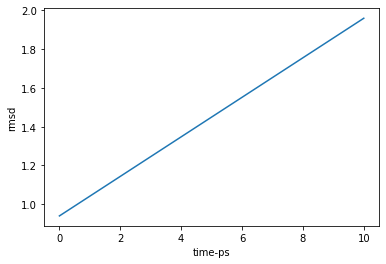

In [48]:
plt.plot(*rmsd.T)
plt.xlabel('time-ps')
plt.ylabel('rmsd')

In [ ]:
#### To plot the graph using numpy and matplotlib and export the graph as PNG SVG and PDF with 300dpi

In [45]:
!printf "Backbone\nSystem\n" | gmx rms -s em.tpr -f md01_noPBC.xtc -o rmsd_xtal.xvg -tu ns
#gmx rms - calculate the root mean square deviation from a reference structure

                    :-) GROMACS - gmx rms, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University,

In [50]:
rmsd_xtal = np.genfromtxt([i for i in open('rmsd_xtal.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'rmsd_xtal')

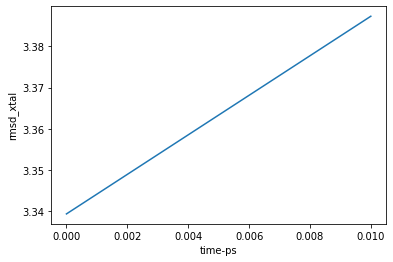

In [52]:
plt.plot(*rmsd_xtal.T)
plt.xlabel('time-ps')
plt.ylabel('rmsd_xtal')

In [46]:
!printf "Protein\nSystem\n" | gmx gyrate -s md01.tpr -f md01_noPBC.xtc -o gyrate.xvg
#gmx gyrate - calculate the radius of gyration

                  :-) GROMACS - gmx gyrate, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [53]:
gyrate = np.genfromtxt([i for i in open('gyrate.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'rmsd')

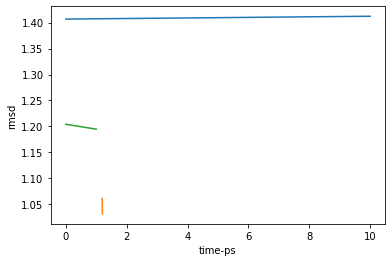

In [55]:
plt.plot(*gyrate.T)
plt.xlabel('time-ps')
plt.ylabel('rmsd')

In [58]:
!printf "keep 1\na CA\nname 1 Calpha\nq\n" | gmx make_ndx -f md01.tpr -o ca.ndx

                 :-) GROMACS - gmx make_ndx, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [60]:
!printf "Calpha\nCalpha\n" | gmx rms -s md01.tpr -f md01.xtc -n ca.ndx -o rmsdca.xvg -fit rot+trans
#gmx rms - calculate the root mean square deviation from a reference structure

                    :-) GROMACS - gmx rms, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University,

In [22]:
rmsdca = np.genfromtxt([i for i in open('rmsdca.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'rmsdca')

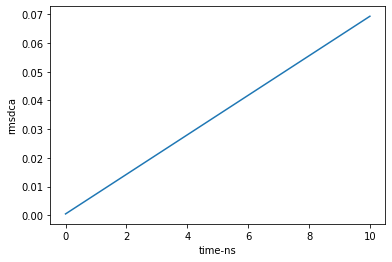

In [23]:
plt.plot(*rmsdca.T)
plt.xlabel('time-ps')
plt.ylabel('rmsdca')

In [63]:
!printf "Calpha\nCalpha\n" | gmx rms -s md01.tpr -f md01.xtc -n ca.ndx -o rmsdxca.xvg -fit rot+trans -xvg none
#gmx rms - calculate the root mean square deviation from a reference structure

                    :-) GROMACS - gmx rms, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University,

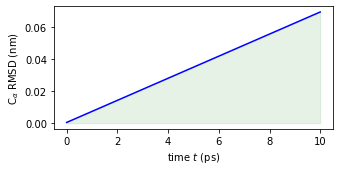

In [103]:
t,rmsd = np.loadtxt("rmsdxca.xvg", unpack=True)

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.fill_between(t,rmsd, color="green", linestyle="-", alpha=0.1)
ax.plot(t,rmsd, color="blue", linestyle="-")

ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r"C$_\alpha$ RMSD (nm)")

fig.savefig("rmsd_ca.png", dpi=300)
fig.savefig("rmsd_ca.svg")
fig.savefig("rmsd_ca.pdf")

In [73]:
!printf "Calpha\n" | gmx rmsf -s md01.tpr -f md01.xtc -n ca.ndx -o rmsf.xvg -fit -xvg none
#gmx rmsf - calculate the per-residue root mean square fluctuations

                   :-) GROMACS - gmx rmsf, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University,

In [101]:
rmsf = np.genfromtxt([i for i in open('rmsf.xvg').read().splitlines() 
    if not i.startswith(('#','@'))])

Text(0, 0.5, 'rmsf')

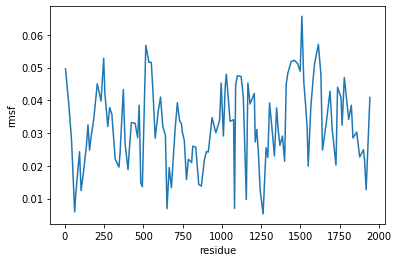

In [102]:
plt.plot(*rmsf.T)
plt.xlabel('residue')
plt.ylabel('rmsf')

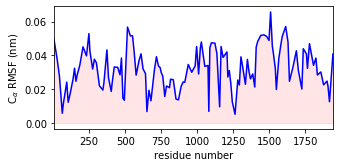

In [16]:
resid, rmsf = np.loadtxt("rmsf.xvg", unpack=True)

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.fill_between(resid, rmsf, color="red", linestyle="-", alpha=0.1)
ax.plot(resid, rmsf, color="blue", linestyle="-")

ax.set_xlabel("residue number")
ax.set_ylabel(r"C$_\alpha$ RMSF (nm)")
ax.set_xlim(resid.min(), resid.max())

fig.savefig("rmsf_ca.png", dpi=300)
fig.savefig("rmsf_ca.svg")
fig.savefig("rmsf_ca.pdf")

In [86]:
!printf "keep 0\ndel 0A\nr 52 & a CA\nname 0 I52\nr 145 & a CA\n name 1 K145\nq\n" | gmx make_ndx -f md01.tpr -o i52k145.ndx

                 :-) GROMACS - gmx make_ndx, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [92]:
!printf "0\n1\n" | gmx distance -f md01_fit.xtc -s md01.tpr -n i52k145.ndx -oall dist.xvg -xvg none
#gmx distance - calculate the distance between atoms or groups of atoms (make a index file with 
#gmx make_ndx to define the groups of interest). gmx mindist is especially useful to find water 
#molecules close to a region of interest.

                 :-) GROMACS - gmx distance, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [ ]:
t,d,x,y,z = np.loadtxt("dist.xvg", unpack=True)

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.fill_between(t, d, color="orange", linestyle="-", alpha=0.1)
ax.plot(t, d, color="orange", linestyle="-", label="i52-i145")

ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r"C$_\alpha$ distance (nm)")
ax.legend(loc="best")

fig.savefig("i52_k145_ca.png", dpi=300)
fig.savefig("i52_k145_ca.svg")
fig.savefig("i52_k145_ca.pdf")

In [93]:
! echo Protein | gmx gyrate -s md01.tpr -f md01.xtc -o gyratea.xvg -xvg none
#gmx gyrate - calculate the radius of gyration

                  :-) GROMACS - gmx gyrate, VERSION 5.1.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

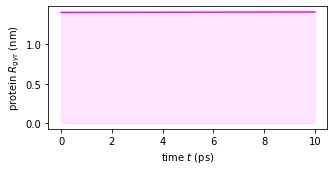

In [95]:
t,data,x,y,z = np.loadtxt("gyratea.xvg", unpack=True)

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.fill_between(t,data, color="magenta", linestyle="-", alpha=0.1)
ax.plot(t,data, color="magenta", linestyle="-")

ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r"protein $R_\mathrm{gyr}$ (nm)")

fig.savefig("rgyr.png", dpi=300)
fig.savefig("rgyr.svg")
fig.savefig("rgyr.pdf")

Visualize

In [19]:
traj1 = pt.load(nv.datafiles.TRR, nv.datafiles.PDB)
view = nv.show_pytraj(traj1)
# show view first
view1 # doctest: +SKIP
# add new Trajectory
traj2 = pt.datafiles.load_tz2()
c = view.add_trajectory(traj2)

In [20]:

traj = pt.datafiles.load_trpcage()[:]
view = nv.show_pytraj(traj)
view

NGLWidget(max_frame=37)

# This notebook is compiled and verfied by Girinath G. Pillai, @giribio
####### Kindly cite this notebook in your publications if you have used it for calculations.
####### Cite as : NyroMDNotebook v1, Girinath G. Pillai : https://github.com/giribio/MDNotebooks